<a href="https://colab.research.google.com/github/slavyolov/Algorithms/blob/main/Taxi_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cmake 'gym[atari]' scipy

In [112]:
import gym
import numpy as np
from datetime import datetime
import time
import matplotlib
import matplotlib.pyplot as plt

is_notebook = 'inline' in matplotlib.get_backend()

if is_notebook:
    from IPython import display

env = gym.make("Taxi-v3").env
env.reset()
env.render()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

# Solving environment without Reinforcement learning (Q learning)

In [91]:
# Set environment to a random state for illustration purposes
env.s = 777

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1

    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1


print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 47
Penalties incurred: 14


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [148]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)

print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 47
State: 475
Action: 5
Reward: 20


# Solving through Reinforcement learning (Q learning)

In [95]:
env.reset() # reset environment to a new, random state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


In [96]:
# Define Q table
q_table = np.zeros([env.observation_space.n, env.action_space.n])
print(q_table)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Train RL model

In [107]:
def plot_durations(episode_durations: list,
                   reward_in_episode: list,
                   epsilon_vec: list,
                   max_steps_per_episode: int = 100) -> None:
    '''Plot graphs containing Epsilon, Rewards, and Steps per episode over time'''
    lines = []
    fig = plt.figure(1, figsize=(15, 7))
    plt.clf()
    ax1 = fig.add_subplot(111)

    plt.title(f'Training...')
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Duration & Rewards')
    ax1.set_ylim(-2 * max_steps_per_episode, max_steps_per_episode + 10)
    ax1.plot(episode_durations, color="C1", alpha=0.2)
    ax1.plot(reward_in_episode, color="C2", alpha=0.2)
    mean_steps = moving_average(episode_durations, periods=5)
    mean_reward = moving_average(reward_in_episode, periods=5)
    lines.append(ax1.plot(mean_steps, label="steps", color="C1")[0])
    lines.append(ax1.plot(mean_reward, label="rewards", color="C2")[0])

    ax2 = ax1.twinx()
    ax2.set_ylabel('Epsilon')
    lines.append(ax2.plot(epsilon_vec, label="epsilon", color="C3")[0])
    labs = [l.get_label() for l in lines]
    ax1.legend(lines, labs, loc=3)

    if is_notebook:
        display.clear_output(wait=True)
    else:
        plt.show()
    plt.pause(0.001)

    return

def moving_average(x: list, periods: int = 5) -> list:
    if len(x) < periods:

        return x

    cumsum = np.cumsum(np.insert(x, 0, 0))
    res = (cumsum[periods:] - cumsum[:-periods]) / periods

    return np.hstack([x[:periods - 1], res])

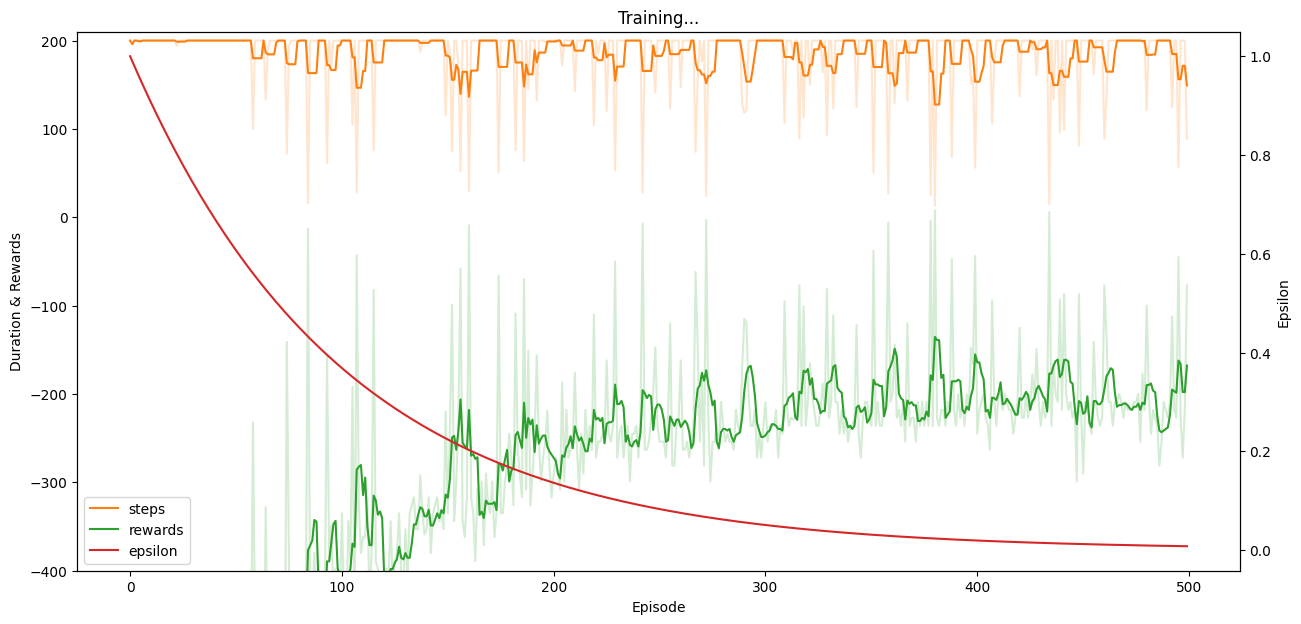


2023-06-27 23:49:03.713731 - Training Ended
Mean Reward: -304.45
Time to train: 
    - 10.82s
    - 0.18min
    - 0.0h
Mean Time Per Episode: 0.021647
Found 101 empty lines in the Q Table - 20%.


(10.82,
 -304.45,
 array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [-0.44851912, -0.44890152, -0.45442141, -0.44872616, -0.44620351,
         -0.49117276],
        [-0.45328833, -0.45774022, -0.45922201, -0.45864373, -0.4524047 ,
         -0.86846811],
        ...,
        [-0.28920802, -0.29018898, -0.28959437, -0.28756059, -0.39472402,
         -0.29917807],
        [-0.41883951, -0.4243611 , -0.42822331, -0.42886599, -0.96184507,
         -0.49058858],
        [-0.02989801, -0.02009799, -0.019999  ,  0.02316844, -0.1       ,
         -0.29720701]]))

<Figure size 640x480 with 0 Axes>

In [138]:
from datetime import datetime

# Training the RL agent :
def train(env=gym.make("Taxi-v3"),
          episodes: int = 25000,
          lr: float = 0.01,
          gamma: float = 0.99,
          epsilon: float = 1,
          max_epsilon: float = 1,
          min_epsilon: float = 0.001,
          epsilon_decay: float = 0.01,
          show_empty: bool = True,
          path_table: str = "qtable",
          path_graph: str = "QLearning_graph.png") -> tuple[float, int]:
    q_table = np.zeros([env.observation_space.n, env.action_space.n])

    start_date = datetime.now()
    start_time = time.time()
    total_reward = []
    steps_per_episode = []
    epsilon_vec = []

    print("{} - Starting Training...\n".format(start_date))
    start_episode = time.time()
    for e in range(episodes):
        state = env.reset()

        done = False
        total_reward.append(0)
        steps_per_episode.append(0)
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(
            -epsilon_decay * e)
        epsilon_vec.append(epsilon)
        # Display random episodes
        display_episode = random.uniform(0, 1) < 0.001

        # Loop as long as the game is not over, i.e. done is not True
        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore the action space
            else:
                action = np.argmax(q_table[state])  # Exploit learned values

            # Apply the action and see what happens
            next_state, reward, done, _ = env.step(action)
            total_reward[e] += reward
            steps_per_episode[e] += 1

            current_value = q_table[
                state, action]  # current Q-value for the state/action couple
            next_max = np.max(q_table[next_state])  # next best Q-value

            # Compute the new Q-value with the Bellman equation
            q_table[state, action] = (1 - lr) * current_value + lr * (
                reward + gamma * next_max)
            state = next_state
            if display_episode:
                env.render()

        if e % int(episodes / 100) == 0:
            episode_time = (time.time() - start_episode)
            print(
                "[EPISODE {}/{}] - Mean reward for last {} Episodes: {} in {} steps - Mean Time Per Episode: {}"
                .format(e, episodes, int(episodes / 100),
                        np.mean(total_reward[-int(episodes / 100):]),
                        np.mean(steps_per_episode[-int(episodes / 100):]),
                        np.round(episode_time / e, 6) if e != 0 else 0))

    plot_durations(steps_per_episode,
                   total_reward,
                   epsilon_vec,
                   max_steps_per_episode=200)
    end_date = datetime.now()
    execution_time = (time.time() - start_time)

    print()
    print("{} - Training Ended".format(end_date))
    print("Mean Reward: {}".format(np.mean(total_reward)))
    print("Time to train: \n    - {}s\n    - {}min\n    - {}h".format(
        np.round(execution_time, 2), np.round(execution_time / 60, 2),
        np.round(execution_time / 3600, 2)))
    print("Mean Time Per Episode: {}".format(
        np.round(execution_time / len(total_reward), 6)))

    if show_empty:
        total_empty = 0
        for i, q in enumerate(q_table):
            if 0 in q:
                total_empty += 1
        print("Found {} empty lines in the Q Table - {}%.".format(
            total_empty, int((total_empty / len(q_table) * 100))))

    np.save(path_table, q_table)
    plt.show()
    plt.savefig(path_graph)

    return np.round(execution_time, 2), np.mean(total_reward), q_table


train(episodes=500)

### Let the agent play

In [145]:
import numpy as np
import datetime
import argparse
import random
import time
import gym
import sys


def play(path: str = "qtable.npy",
         slow: bool = False,
         render: bool = False,
         is_loop: bool = False,
         is_time: bool = False) -> tuple[int, int]:
    env = gym.make("Taxi-v3").env

    q_table = np.load(path)
    done = False
    result = 0
    state = env.reset()

    if render:
        print("Initial Environnement:")
        env.render()
    steps = 1

    while not done:
        action = np.argmax(q_table[state])
        next_state, reward, done, _ = env.step(action)

        result += reward
        state = next_state

        if render or (random.uniform(0, 1) < 0.3 and not is_loop
                      and not is_time):
            print()
            env.render()
        steps += 1

        if steps >= 100:
            break

        if slow:
            input("Press anything to continue...")
            print("\r", end="\r")

    if (not is_loop and not is_time):
        print("[{} MOVES] - Total reward: {}".format(steps, result))

    return steps, result


def display_data(total, total_failed, start, mean_steps, mean_result):
    print()
    print(
        "[{} LOOP DONE - {}% FAILED - {} SECONDES] - Mean Steps Per Loop: {} - Mean Reward Per Loop: {} - Mean Time Per Loop: {}"
        .format(total, np.round(total_failed / total * 100, 2),
                np.round(time.time() - start, 4),
                np.round(mean_steps / total, 2),
                np.round(mean_result / total, 2),
                np.round((time.time() - start) / total, 6)))


def solve(path, mean_steps, mean_result, total_failed, slow, render, is_loop,
          is_time):
    steps, result = play(path=path,
                         slow=slow,
                         render=render,
                         is_loop=is_loop,
                         is_time=is_time)
    mean_steps += steps
    mean_result += result
    if steps >= 100:
        total_failed += 1

    return mean_steps, mean_result, total_failed


def error_args(args):
    time = args.time
    loop = args.loop

    if time < 0:
        return 1, "Time can not be negative or null."
    if loop <= 0:
        return 1, "Number of loop can not be negative or null"

    return 0, ""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
import time
loop = 0
time_ = 0
slow = False
render = False


start = time.time()
mean_steps, mean_result = 0, 0
total_failed = 0
is_loop = True if loop != 1 else False
maxrt = datetime.timedelta(seconds=time_) if time_ != 0 else None

if maxrt != None:
    stop = datetime.datetime.now() + maxrt
    total = 0
    while datetime.datetime.now() < stop:
        mean_steps, mean_result, total_failed = solve(
            "qtable.npy", mean_steps, mean_result, total_failed, slow,
            render, is_loop, True)
        total += 1

    display_data(total, total_failed, start, mean_steps, mean_result)
else:
    for l in range(loop):
        mean_steps, mean_result, total_failed = solve(
            "qtable.npy", mean_steps, mean_result, total_failed, slow,
            render, is_loop, False)

    if is_loop:
        display_data(loop, total_failed, start, mean_steps,
                      mean_result)

ZeroDivisionError: ignored

In [24]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []
frames = [] # for animation


for i in range(1, 250):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action)

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state

        epochs += 1

        # Put each rendered frame into dict for animation
        frames.append({
            'frame': env.render(mode='ansi'),
            'state': state,
            'action': action,
            'reward': reward
            }
        )

    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Episode: 200
Training finished.

CPU times: user 1.16 s, sys: 31.6 ms, total: 1.19 s
Wall time: 1.26 s


In [25]:
len(frames)

6422

In [29]:
q_table[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0., 0., 0., 0., 0., 0.])

In [32]:
q_table[483]

array([-2.45941797, -2.46004432, -2.45923556, -2.46058512, -5.74627086,
       -3.69371686])

In [26]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print("episode", i)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)

print_frames(frames)

episode 639
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Timestep: 640
State: 274
Action: 2
Reward: -1


KeyboardInterrupt: ignored

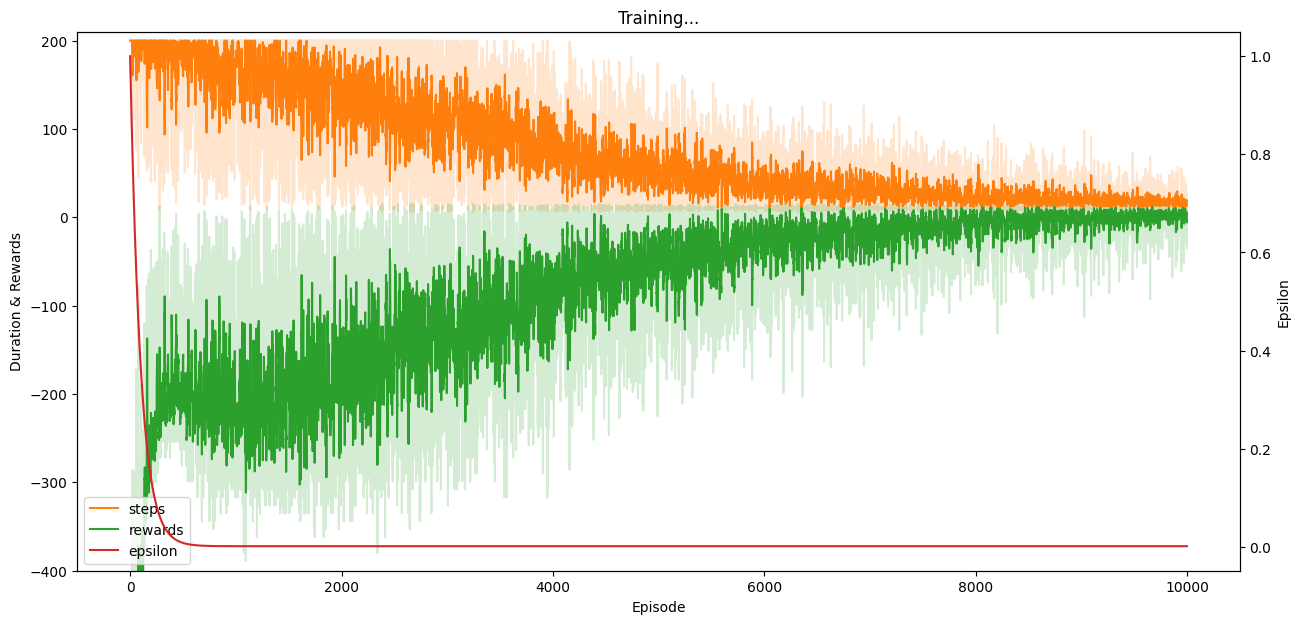


2023-06-27 22:26:48.721165 - Training Ended
Mean Reward: -85.7798
Time to train: 
    - 309.14s
    - 5.15min
    - 0.09h
Mean Time Per Episode: 0.030914
Found 101 empty lines in the Q Table - 20%.


(309.14, -85.7798)

<Figure size 640x480 with 0 Axes>

In [20]:
from datetime import datetime


def train(env=gym.make("Taxi-v3"),
          episodes: int = 25000,
          lr: float = 0.01,
          gamma: float = 0.99,
          epsilon: float = 1,
          max_epsilon: float = 1,
          min_epsilon: float = 0.001,
          epsilon_decay: float = 0.01,
          show_empty: bool = True,
          path_table: str = "qtable",
          path_graph: str = "QLearning_graph.png") -> tuple[float, int]:
    q_table = np.zeros([env.observation_space.n, env.action_space.n])

    start_date = datetime.now()
    start_time = time.time()
    total_reward = []
    steps_per_episode = []
    epsilon_vec = []

    print("{} - Starting Training...\n".format(start_date))
    start_episode = time.time()
    for e in range(episodes):
        state = env.reset()

        done = False
        total_reward.append(0)
        steps_per_episode.append(0)
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(
            -epsilon_decay * e)
        epsilon_vec.append(epsilon)
        # Display random episodes
        display_episode = random.uniform(0, 1) < 0.001

        # Loop as long as the game is not over, i.e. done is not True
        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore the action space
            else:
                action = np.argmax(q_table[state])  # Exploit learned values

            # Apply the action and see what happens
            next_state, reward, done, _ = env.step(action)
            total_reward[e] += reward
            steps_per_episode[e] += 1

            current_value = q_table[
                state, action]  # current Q-value for the state/action couple
            next_max = np.max(q_table[next_state])  # next best Q-value

            # Compute the new Q-value with the Bellman equation
            q_table[state, action] = (1 - lr) * current_value + lr * (
                reward + gamma * next_max)
            state = next_state
            if display_episode:
                env.render()

        if e % int(episodes / 100) == 0:
            episode_time = (time.time() - start_episode)
            print(
                "[EPISODE {}/{}] - Mean reward for last {} Episodes: {} in {} steps - Mean Time Per Episode: {}"
                .format(e, episodes, int(episodes / 100),
                        np.mean(total_reward[-int(episodes / 100):]),
                        np.mean(steps_per_episode[-int(episodes / 100):]),
                        np.round(episode_time / e, 6) if e != 0 else 0))

    plot_durations(steps_per_episode,
                   total_reward,
                   epsilon_vec,
                   max_steps_per_episode=200)
    end_date = datetime.now()
    execution_time = (time.time() - start_time)

    print()
    print("{} - Training Ended".format(end_date))
    print("Mean Reward: {}".format(np.mean(total_reward)))
    print("Time to train: \n    - {}s\n    - {}min\n    - {}h".format(
        np.round(execution_time, 2), np.round(execution_time / 60, 2),
        np.round(execution_time / 3600, 2)))
    print("Mean Time Per Episode: {}".format(
        np.round(execution_time / len(total_reward), 6)))

    if show_empty:
        total_empty = 0
        for i, q in enumerate(q_table):
            if 0 in q:
                total_empty += 1
        print("Found {} empty lines in the Q Table - {}%.".format(
            total_empty, int((total_empty / len(q_table) * 100))))

    np.save(path_table, q_table)
    plt.show()
    plt.savefig(path_graph)

    return np.round(execution_time, 2), np.mean(total_reward)


train(episodes=10000)

In [25]:
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

State: 328


/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [24]:
q_table[328]

array([-0.89527716, -0.8963011 , -0.84922833, -0.83439642, -1.94986133,
       -2.7433924 ])

In [ ]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0

    done = False

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 13.22
Average penalties per episode: 0.0


In [ ]:
total_epochs

1322

In [ ]:
https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

In [ ]:
import seaborn as sns

sns.set()

In [ ]:
!pip install gym

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install cmake 'gym[atari]' scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.2 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime3
import numpy as np
import matplotlib
import argparse
import random
import time
import gym

is_notebook = 'inline' in matplotlib.get_backend()

if is_notebook:
    from IPython import display


def moving_average(x: list, periods: int = 5) -> list:
    if len(x) < periods:

        return x

    cumsum = np.cumsum(np.insert(x, 0, 0))
    res = (cumsum[periods:] - cumsum[:-periods]) / periods

    return np.hstack([x[:periods - 1], res])


def plot_durations(episode_durations: list,
                   reward_in_episode: list,
                   epsilon_vec: list,
                   max_steps_per_episode: int = 100) -> None:
    '''Plot graphs containing Epsilon, Rewards, and Steps per episode over time'''
    lines = []
    fig = plt.figure(1, figsize=(15, 7))
    plt.clf()
    ax1 = fig.add_subplot(111)

    plt.title(f'Training...')
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Duration & Rewards')
    ax1.set_ylim(-2 * max_steps_per_episode, max_steps_per_episode + 10)
    ax1.plot(episode_durations, color="C1", alpha=0.2)
    ax1.plot(reward_in_episode, color="C2", alpha=0.2)
    mean_steps = moving_average(episode_durations, periods=5)
    mean_reward = moving_average(reward_in_episode, periods=5)
    lines.append(ax1.plot(mean_steps, label="steps", color="C1")[0])
    lines.append(ax1.plot(mean_reward, label="rewards", color="C2")[0])

    ax2 = ax1.twinx()
    ax2.set_ylabel('Epsilon')
    lines.append(ax2.plot(epsilon_vec, label="epsilon", color="C3")[0])
    labs = [l.get_label() for l in lines]
    ax1.legend(lines, labs, loc=3)

    if is_notebook:
        display.clear_output(wait=True)
    else:
        plt.show()
    plt.pause(0.001)

    return


def train(env=gym.make("Taxi-v3"),
          episodes: int = 25000,
          lr: float = 0.01,
          gamma: float = 0.99,
          epsilon: float = 1,
          max_epsilon: float = 1,
          min_epsilon: float = 0.001,
          epsilon_decay: float = 0.01,
          show_empty: bool = True,
          path_table: str = "qtable",
          path_graph: str = "QLearning_graph.png") -> tuple[float, int]:
    q_table = np.zeros([env.observation_space.n, env.action_space.n])

    start_date = datetime.now()
    start_time = time.time()
    total_reward = []
    steps_per_episode = []
    epsilon_vec = []

    print("{} - Starting Training...\n".format(start_date))
    start_episode = time.time()
    for e in range(episodes):
        state = env.reset()

        done = False
        total_reward.append(0)
        steps_per_episode.append(0)
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(
            -epsilon_decay * e)
        epsilon_vec.append(epsilon)
        # Display random episodes
        display_episode = random.uniform(0, 1) < 0.001

        # Loop as long as the game is not over, i.e. done is not True
        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore the action space
            else:
                action = np.argmax(q_table[state])  # Exploit learned values

            # Apply the action and see what happens
            next_state, reward, done, _ = env.step(action)
            total_reward[e] += reward
            steps_per_episode[e] += 1

            current_value = q_table[
                state, action]  # current Q-value for the state/action couple
            next_max = np.max(q_table[next_state])  # next best Q-value

            # Compute the new Q-value with the Bellman equation
            q_table[state, action] = (1 - lr) * current_value + lr * (
                reward + gamma * next_max)
            state = next_state
            if display_episode:
                env.render()

        if e % int(episodes / 100) == 0:
            episode_time = (time.time() - start_episode)
            print(
                "[EPISODE {}/{}] - Mean reward for last {} Episodes: {} in {} steps - Mean Time Per Episode: {}"
                .format(e, episodes, int(episodes / 100),
                        np.mean(total_reward[-int(episodes / 100):]),
                        np.mean(steps_per_episode[-int(episodes / 100):]),
                        np.round(episode_time / e, 6) if e != 0 else 0))

    plot_durations(steps_per_episode,
                   total_reward,
                   epsilon_vec,
                   max_steps_per_episode=200)
    end_date = datetime.now()
    execution_time = (time.time() - start_time)

    print()
    print("{} - Training Ended".format(end_date))
    print("Mean Reward: {}".format(np.mean(total_reward)))
    print("Time to train: \n    - {}s\n    - {}min\n    - {}h".format(
        np.round(execution_time, 2), np.round(execution_time / 60, 2),
        np.round(execution_time / 3600, 2)))
    print("Mean Time Per Episode: {}".format(
        np.round(execution_time / len(total_reward), 6)))

    if show_empty:
        total_empty = 0
        for i, q in enumerate(q_table):
            if 0 in q:
                total_empty += 1
        print("Found {} empty lines in the Q Table - {}%.".format(
            total_empty, int((total_empty / len(q_table) * 100))))

    np.save(path_table, q_table)
    plt.show()
    plt.savefig(path_graph)

    return np.round(execution_time, 2), np.mean(total_reward)


if __name__ == "__main__":
    parser = argparse.ArgumentParser(
        description="Train Taxi Driver Using the Q-Learning Algorithm")
    parser.add_argument(
        "--episodes",
        type=int,
        default=25000,
        help="Number of episodes",
    )
    parser.add_argument("-l",
                        "--learning_rate",
                        type=float,
                        default=0.01,
                        help="Learning Rate")
    parser.add_argument("-g",
                        "--gamma",
                        type=float,
                        default=0.99,
                        help="Discount Rating")
    parser.add_argument("-e",
                        "--epsilon",
                        type=float,
                        default=1,
                        help="Exploration Rate")
    parser.add_argument("--min_epsilon",
                        type=float,
                        default=0.001,
                        help="Minimal value for Exploration Rate")
    parser.add_argument("-d",
                        "--decay_rate",
                        type=float,
                        default=0.01,
                        help="Exponential decay rate for Exploration Rate")
    parser.add_argument("--show_empty",
                        dest="empty",
                        action="store_true",
                        default=True,
                        help="Render State")

    args = parser.parse_args()

    plt.ion()

    epsilon = args.epsilon
    max_epsilon = args.epsilon
    episodes = args.episodes
    lr = args.learning_rate
    gamma = args.gamma
    min_epsilon = args.min_epsilon
    epsilon_decay = args.decay_rate
    show_empty = args.empty

    env = gym.make("Taxi-v3")

    time, reward = train(env, episodes, lr, gamma, epsilon, max_epsilon,
                         min_epsilon, epsilon_decay, show_empty)
    plt.ioff()


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
usage: ipykernel_launcher.py [-h] [--episodes EPISODES] [-l LEARNING_RATE]
                             [-g GAMMA] [-e EPSILON]
                             [--min_epsilon MIN_EPSILON] [-d DECAY_RATE]
                             [--show_empty]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-1cd13015-3832-4375-911a-b96590b1850c.json


SystemExit: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


AttributeError: ignored

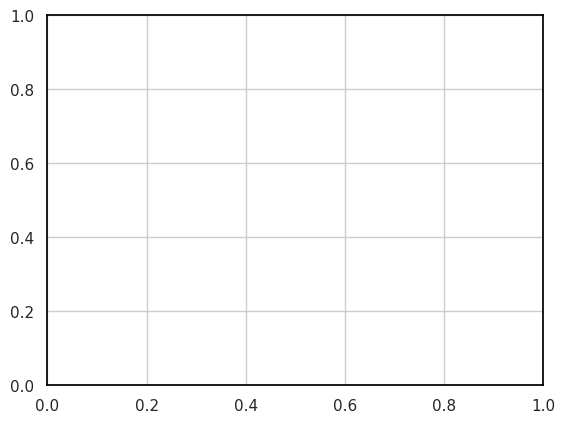

In [ ]:
plot_vanilla([1,2,3,10,20], min_len=5)